In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage import rotate
from shapely.geometry import Polygon 
import folium

Duplicate key in file '/Users/alikhannurlanuly/.matplotlib/matplotlibrc', line 2 ('backend: notebook')
Bad value in file '/Users/alikhannurlanuly/.matplotlib/matplotlibrc', line 2 ('backend: notebook'): Key backend: 'notebook' is not a valid value for backend; supported values are ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


# Data preparation

In [2]:
model = {'model_id': 'model_1640476800000', 'state': 'FITTED', 'doc_type': 'models', 'end_time': 1642507200000, 'curr_page_id': 'feature_data_1642291200000_0', 'num_samples': 5009, 'GMM_params': {'cluster_MADs': [0.6264521609220124, 0.7006053406031293, 0.8873397395470978, 0.8279440110783146, 0.5629426828803732, 0.29773722075588815, 0.29608437777116087, 0.8450177106947973, 0.5224524181841085, 0.6274675066342983], 'means': [[0.44666817558906285, 0.10646918764423734, 0.8614863653180402, 0.21643934262754969], [0.44978278814410505, 0.7063383187416716, 0.6201695270592043, 0.15236715707798523], [0.3634042567129927, 0.2621695663902291, 0.5283074855701019, 0.877757140056179], [0.4948013938442351, 0.03729159386710855, 0.6732865513147068, 0.14285641058795262], [0.5410790341112078, 0.5699461522388112, 0.8654083684202545, 0.21934736251731057], [0.2519979720027059, 0.810644947680866, 0.8657414695350596, 0.2187034483981429], [0.5000000422546336, 0.7619311654949409, 0.8643540536856039, 0.21649380423332285], [0.3890135347999196, 0.5628729188124062, 0.2865697874390528, 0.9171807183414179], [0.7127845989782479, 0.8125803717755518, 0.8663538079717287, 0.21964276598938423], [3.7313528816838896e-07, 0.5553207878812385, 0.8627512519956044, 0.21860369818525685]], 'feat_scales': [0.16666666666666666, 0.0006949270326615705, 0.021554869104824133, 0.004424710628349616], 'feat_mins': [0.0, 0.0, -0.02779866803841854, 0.5404934915161483], 'cluster_mean_probas': [5.553141330251162, 3.3047145376113396, 3.637317020590752, 4.467024826416898, 6.612703370300412, 6.847412658057734, 7.832623462250009, 2.189548136066742, 6.570849496150648, 7.111590400576859], 'cluster_proba_quartiles': [[5.161916625138766, 5.797036206508879, 6.163382466114239], [2.921909147690744, 3.8200246964394817, 4.181030464911799], [3.163312420871241, 3.805754453291348, 4.359541977805899], [3.666688105708023, 4.876411076217477, 5.273275707583276], [6.331416103689531, 6.858774089745033, 7.187037854572301], [6.651664821560691, 7.067250178557666, 7.223314767292144], [7.719371478160563, 8.127724018108033, 8.273353422509064], [1.657334829149645, 2.362642352807436, 2.905648770256635], [6.39234567268864, 6.877468870715457, 7.198674999211854], [6.746598290265467, 7.195244501945506, 7.616261563096716]], 'cluster_proba_skews': [-1.24305446233268, -2.303991517008245, -1.6306751260780494, -1.165702949214554, -2.4856798213858293, -1.5509871718541453, -2.4621312883657143, -1.1047899496708742, -1.7415659674738968, -0.9768551411315494], 'precisions_cholesky': [[[4.138561368269572, 0.03552761556649845, -0.033825122772030626, -0.06971245345446561], [0.0, 9.360173906052646, 0.6317556348888932, -0.09048956165467129], [0.0, 0.0, 27.517285598127998, -2.2066648440480017], [0.0, 0.0, 0.0, 29.34184643330229]], [[4.66773335352332, 0.1619817135723966, -0.38521530986170055, -0.10473861385949002], [0.0, 6.842807436472069, -0.5934709623159313, 0.09164734633141927], [0.0, 0.0, 9.530779208857997, 6.677963784731634], [0.0, 0.0, 0.0, 19.612485707264312]], [[3.9055002663497995, -0.19236141850986102, -0.3265293964025156, 0.03703578848753448], [0.0, 5.588351053641384, -0.3290476273364423, 0.04762858223199525], [0.0, 0.0, 10.110247842624945, -1.939936915701373], [0.0, 0.0, 0.0, 30.35158114463148]], [[4.130120176321616, -0.011710885142987954, -2.412059800944198, 0.3737322641874092], [0.0, 22.262228275246734, -3.294663660871789, 1.1504627802485743], [0.0, 0.0, 7.662902960564789, 7.400130796556761], [0.0, 0.0, 0.0, 20.756189799901463]], [[4.94949119407931, -1.1082195384199722, -0.08065997569580455, -0.0197392689543079], [0.0, 16.79438042915501, -0.20905784478558942, -0.2728343905612157], [0.0, 0.0, 27.171547326063347, -2.7884919812719873], [0.0, 0.0, 0.0, 30.967349089684017]], [[10.217079565112195, 1.2121691828843202, 0.25271546093451414, -0.12817588964260537], [0.0, 11.10487081775398, -0.038465554714760444, 0.06959598038797866], [0.0, 0.0, 27.133662127953677, -2.621413575624354], [0.0, 0.0, 0.0, 30.123191761564367]], [[31.620893799964936, -4.507721787672139e-05, -4.186966773688888e-06, -4.2761077918649735e-06], [0.0, 7.219851028078099, -0.1724182777974862, 0.35027738933333247], [0.0, 0.0, 26.97424871164239, -2.3859018615601135], [0.0, 0.0, 0.0, 28.8727459384461]], [[4.277299408585062, -0.5501872534989748, -0.3488531663606273, -0.027892945281188714], [0.0, 4.433925220481308, -3.328135306162188, -0.21812908136826897], [0.0, 0.0, 5.338890279104723, 5.097222604281778], [0.0, 0.0, 0.0, 22.454919011476825]], [[7.735179139856863, -1.182931559877021, -0.1699415745737199, -0.1385525064615623], [0.0, 10.783227941461265, -0.26121153499210353, 0.007146588424680389], [0.0, 0.0, 27.00066740782032, -2.724825972543624], [0.0, 0.0, 0.0, 30.849871284577212]], [[31.621793351923856, 0.00012972206569059915, 2.802618841558899e-05, 2.1933703881147983e-05], [0.0, 3.666896372645783, -0.29955129291602217, -0.05576828220518302], [0.0, 0.0, 27.44330955497156, -2.7185093649354473], [0.0, 0.0, 0.0, 30.959407065625292]]], 'cluster_stddev_probas': [0.8312881944962145, 1.4445039451060822, 0.9958890170561542, 1.0986507454434131, 0.9224717892260978, 0.5307832617520802, 0.7247803393404947, 0.8787656981878467, 0.8968273574405969, 0.5807300433279833], 'covariances': [[[0.05838498877462638, -0.00022160693346711755, 7.68564484586206e-05, 0.00014381181261259438], [-0.00022160693346711703, 0.011414691233456793, -0.0002623366088650813, 1.4947003148285033e-05], [7.685644845862058e-05, -0.0002623366088650813, 0.0013267706188535475, 9.915385571241884e-05], [0.00014381181261259438, 1.4947003148285023e-05, 9.915385571241886e-05, 0.0011693604745940268]], [[0.04589738289105048, -0.001086474637523011, 0.0017874281892629996, -0.00035842371229521263], [-0.001086474637523011, 0.02138228190521439, 0.0012875376174114703, -0.0005441204639986897], [0.0017874281892629996, 0.0012875376174114699, 0.011161298984697813, -0.00379684340765706], [-0.0003584237122952128, -0.0005441204639986896, -0.0037968434076570594, 0.0038932054732856033]], [[0.06556116413124806, 0.002256736989210269, 0.0021908682801680757, 5.6489698343523424e-05], [0.0022567369892102698, 0.032098515113744674, 0.001117562238038384, 1.8305914215558584e-05], [0.0021908682801680753, 0.001117562238038384, 0.009890228140448185, 0.0006277119516243628], [5.648969834352345e-05, 1.8305914215558574e-05, 0.000627711951624363, 0.001125541701022303]], [[0.058623888618338234, 3.0838675165685626e-05, 0.01846636045138068, -0.007641026680826806], [3.0838675165685714e-05, 0.0020177447611026663, 0.0008772360950667002, -0.0004251516094047548], [0.01846636045138068, 0.0008772360950667002, 0.023219791687386724, -0.008659595015650542], [-0.007641026680826808, -0.00042515160940475476, -0.008659595015650542, 0.005569680922854953]], [[0.04082055340683196, 0.0026936471425902573, 0.0001419025889713937, 6.252978532186473e-05], [0.0026936471425902577, 0.0037232024994246055, 3.664252872082129e-05, 3.7819372410658875e-05], [0.0001419025889713937, 3.6642528720821294e-05, 0.001355178998592712, 0.0001224420002869498], [6.252978532186473e-05, 3.7819372410658875e-05, 0.0001224420002869498, 0.0010541766901520878]], [[0.009579579569825442, -0.001045673680504753, -9.070394822168227e-05, 3.528421775179421e-05], [-0.001045673680504753, 0.008223248130468153, 2.1396658671197483e-05, -2.158621448621194e-05], [-9.070394822168226e-05, 2.1396658671197483e-05, 0.0013591359474919124, 0.00011784084074746006], [3.528421775179421e-05, -2.1586214486211923e-05, 0.00011784084074746008, 0.001112496581575644]], [[0.001000119089471953, 6.24425433758517e-09, 1.9515238524863635e-10, 8.849211530766415e-11], [6.24425433758517e-09, 0.019184192642391063, 0.00012262456284592552, -0.0002226050392350241], [1.9515238524863632e-10, 0.00012262456284592552, 0.0013751462737221388, 0.00011214767897564206], [8.849211530766425e-11, -0.0002226050392350241, 0.00011214767897564206, 0.00121153302346575]], [[0.05465887599437748, 0.0067823915305958125, 0.007799493246099352, -0.0016366890206054834], [0.0067823915305958125, 0.05170709317148498, 0.032676127810073105, -0.006906704744963899], [0.007799493246099356, 0.032676127810073105, 0.05596224662704603, -0.01237621314828672], [-0.0016366890206054837, -0.006906704744963899, -0.01237621314828672, 0.004723498677914321]], [[0.0167131860580223, 0.0018334542644799208, 0.0001229297227165992, 8.549510476719761e-05], [0.0018334542644799208, 0.008801210643375804, 9.668493771393013e-05, 1.473525380260332e-05], [0.00012292972271659921, 9.668493771393014e-05, 0.0013733833715956385, 0.00012183428255684988], [8.549510476719761e-05, 1.473525380260332e-05, 0.00012183428255684988, 0.0010618768316337775]], [[0.0010000621890754648, -3.537872898555008e-08, -1.4074714738873436e-09, -8.958279848155357e-10], [-3.537872898555008e-08, 0.07437084676507846, 0.000811778304657659, 0.0002052481586938374], [-1.4074714738873434e-09, 0.000811778304657659, 0.001336643561711449, 0.00011883139473272097], [-8.958279848155355e-10, 0.0002052481586938374, 0.00011883139473272097, 0.0010541174362296085]]], 'weights': [0.17417681839934668, 0.051877394630916535, 0.13801472094944842, 0.00846102175463633, 0.19609055726196906, 0.16220690690782005, 0.0998754448395693, 0.010917201589980684, 0.11145901876512694, 0.04692091490118513], 'n_components': 10, 'precisions': [[[17.134956375498337, 0.3174836976127359, -0.7769435434794077, -2.045492103749664], [0.3174836976127359, 88.02015909453117, 17.58388036792103, -2.6551308218882044], [-0.7769435434794077, 17.58388036792103, 762.0703764228999, -64.74762098382341], [-2.045492103749664, -2.6551308218882044, -64.74762098382341, 860.9439521154943]], [[21.973333747310967, 1.3274247588294839, -4.370842736380352, -2.0541845673179235], [1.3274247588294839, 47.18462063183923, -5.044223048933651, 1.797432270033663], [-4.370842736380352, -5.044223048933651, 135.4309526381871, 130.97146928167788], [-2.0541845673179235, 1.797432270033663, 130.97146928167788, 384.6495956176469]], [[15.397928342133365, -0.9657754505701793, -3.3731402188212347, 1.124094739534811], [-0.9657754505701793, 31.340208321635938, -3.419149509313489, 1.445602778418157], [-3.3731402188212347, -3.419149509313489, 105.9804666762033, -58.88015271237634], [1.124094739534811, 1.445602778418157, -58.88015271237634, 921.2184779791493]], [[23.015738104315336, 8.116180435387738, -15.717712551834476, 7.757257809820781], [8.116180435387738, 507.7851810262016, -16.733112870549874, 23.879223824561738], [-15.717712551834476, -16.733112870549874, 113.48201758918042, 153.59851935742813], [7.757257809820781, 23.879223824561738, 153.59851935742813, 430.81941500953354]], [[25.73250929602251, -18.589612375152882, -2.1366135537424142, -0.6112728324832147], [-18.589612375152882, 282.1693577863241, -4.919628613181269, -8.448957816180357], [-2.1366135537424142, -4.919628613181269, 746.0686716221184, -86.35220461783426], [-0.6112728324832147, -8.448957816180357, -86.35220461783426, 958.9767096423535]], [[105.93836313064865, 13.442340818101153, 7.193097948684039, -3.8610669029133136], [13.442340818101153, 123.32447907838963, -1.2261512129925591, 2.0964530630611544], [7.193097948684039, -1.2261512129925591, 743.1074296084153, -78.96534382490053], [-3.8610669029133136, 2.0964530630611544, -78.96534382490053, 907.4066819039793]], [[999.8809247107287, -0.00032622671210367506, -0.00010273790956002463, -0.00012346297387992713], [-0.00032622671210367506, 52.27867117963721, -5.486580983015256, 10.113470070203478], [-0.00010273790956002463, -5.486580983015256, 733.3026212505371, -68.88753828289076], [-0.00012346297387992713, 10.113470070203478, -68.88753828289076, 833.6354580260559]], [[18.72047279267116, -1.2723743371143312, -2.0046653299049253, -0.6263338272806472], [-1.2723743371143312, 30.783757773082066, -18.880401717816085, -4.8980708561723185], [-2.0046653299049253, -18.880401717816085, 54.485427689920016, 114.4577207626163], [-0.6263338272806472, -4.8980708561723185, 114.4577207626163, 504.22338781198334]], [[61.28040033684521, -12.712420127487762, -4.211004465658822, -4.27432699049475], [-12.712420127487762, 116.34628737725, -7.072358989162655, 0.2204713330252394], [-4.211004465658822, -7.072358989162655, 736.4607170483788, -84.06053052584372], [-4.27432699049475, 0.2204713330252394, -84.06053052584372, 951.7145582749816]], [[999.9378148098701, 0.0004660588861697295, 0.0007095043849263448, 0.0006790544669133458], [0.0004660588861697295, 13.538970086110577, -8.069072261645202, -1.7265529501409285], [0.0007095043849263448, -8.069072261645202, 760.525532497235, -84.16343804075102], [0.0006790544669133458, -1.7265529501409285, -84.16343804075102, 958.4848858550893]]]}, 'start_time': 1640476800000, 'start_page_id': 'feature_data_1640476800000_0', 'window_len': 2030400000}
model_params = model['GMM_params']
cluster_means = np.array(model_params["means"])
cluster_covs = np.array(model_params["covariances"])
cluster_means_3D = cluster_means[:, 1:]
cluster_covs_3D = cluster_covs[:, 1:, 1:]

# Data points
xtest_MF = np.array([[1, 805, 42.43343, -71.44951, 1642512339000,
        'blizardo@leaderbnk.com'],
       [1, 807, 42.57509, -71.99813, 1642512453000,
        'christopher.gambon@leaderbnk.com'],
       [1, 807, 40.71427, -74.00597, 1642512437000,
        'wendy.lazo@leaderbnk.com'],
       [1, 808, 26.12231, -80.14338, 1642512504000,
        'jfrancis@leaderbnk.com'],
       [1, 809, 42.35843, -71.05977, 1642512578000,
        'kmcilree@leaderbnk.com'],
       [1, 806, 41.63622, -70.9342, 1642512375000,
        'dohare@leaderbnk.com'],
       [1, 808, 42.3751, -71.10561, 1642512511000,
        'aabdurhman@leaderbnk.com'],
       [1, 784, 38.88101, -77.10428, 1642511099000,
        'trina.arzaga@leaderbnk.com'],
       [1, 807, 34.98543, -80.54951, 1642512459000,
        'donna.malenchak@leaderbnk.com'],
       [1, 794, 41.9001, -71.08977, 1642511665000,
        'bnickerson@leaderbnk.com'],
       [1, 805, 40.71427, -74.00597, 1642512319000, 'spoe@leaderbnk.com'],
       [1, 809, 41.16704, -73.20483, 1642512560000,
        'jaguilar@leaderbnk.com'],
       [1, 808, 40.71427, -74.00597, 1642512522000,
        'matthew.bomgaars@leaderbnk.com'],
       [1, 785, 40.71427, -74.00597, 1642511123000,
        'cgrey@leaderbnk.com'],
       [1, 787, 40.71427, -74.00597, 1642511227000,
        'ppatel@leaderbnk.com'],
       [1, 795, 42.3751, -71.10561, 1642511756000,
        'logan.angers@leaderbnk.com'],
       [1, 801, 40.71427, -74.00597, 1642512080000,
        'rchowdhury@leaderbnk.com'],
       [1, 800, 30.8327, -83.27849, 1642512041000,
        'tprivette@leaderbnk.com'],
       [1, 793, 40.71427, -74.00597, 1642511586000,
        'nkumar@leaderbnk.com'],
       [1, 784, 40.71427, -74.00597, 1642511055000,
        'cdisessa@leaderbnk.com'],
       [1, 807, 40.71427, -74.00597, 1642512424000,
        'justin.lopez@leaderbnk.com'],
       [1, 805, 42.15843, -71.14477, 1642512357000,
        'rmates@leaderbnk.com'],
       [1, 806, 40.71427, -74.00597, 1642512365000,
        'jazevedo@leaderbnk.com'],
       [1, 794, 40.71427, -74.00597, 1642511650000,
        'rsingh@leaderbnk.com'],
       [1, 783, 19.01441, 72.84794, 1642511024000,
        'prinshu.singh@leaderbnk.com'],
       [1, 806, 40.71427, -74.00597, 1642512376000,
        'amansharma@leaderbnk.com'],
       [1, 798, 42.35843, -71.05977, 1642511916000,
        'jenniffer.rogers@leaderbnk.com'],
       [1, 789, 42.35843, -71.05977, 1642511358000,
        'kristen.melancon@leaderbnk.com'],
       [1, 795, 40.71427, -74.00597, 1642511700000,
        'bcournoyer@leaderbnk.com'],
       [1, 783, 41.63622, -70.9342, 1642510988000,
        'jsergi@leaderbnk.com'],
       [1, 780, 41.63622, -70.9342, 1642510809000,
        'lb_azure_api@leaderbnk.com'],
       [1, 802, 40.71427, -74.00597, 1642512136000,
        'jgodin@leaderbnk.com'],
       [1, 780, 41.63622, -70.9342, 1642510806000,
        'lb_azure_api@leaderbnk.com'],
       [1, 796, 42.3751, -71.10561, 1642511809000,
        'liam.daly@leaderbnk.com'],
       [1, 792, 40.71427, -74.00597, 1642511539000, 'sjha@leaderbnk.com'],
       [1, 805, 35.08058, -83.081184, 1642512352000,
        'sonita.acha@leaderbnk.com'],
       [1, 786, 40.71427, -74.00597, 1642511193000,
        'andrea.stephenson@leaderbnk.com'],
       [1, 805, 40.71427, -74.00597, 1642512308000,
        'aclarke@leaderbnk.com'],
       [1, 798, 42.50482, -71.19561, 1642511889000,
        'daniel.sutphin@leaderbnk.com'],
       [1, 786, 25.77427, -80.19366, 1642511185000,
        'kcanepa@leaderbnk.com'],
       [1, 783, 41.63622, -70.9342, 1642510995000,
        'worellana@leaderbnk.com'],
       [1, 799, 40.71427, -74.00597, 1642511951000,
        'slumnah@leaderbnk.com'],
       [1, 801, 40.71427, -74.00597, 1642512066000,
        'donna.stone@leaderbnk.com'],
       [1, 792, 41.63622, -70.9342, 1642511577000,
        'a-mpagotti@leaderbnk.com'],
       [1, 809, 42.35843, -71.05977, 1642512573000,
        'thomas.sullivan@leaderbnk.com'],
       [1, 798, 41.63622, -70.9342, 1642511916000,
        'ross.barnard@leaderbnk.com'],
       [1, 798, 40.71427, -74.00597, 1642511881000,
        'sydney.clapp@leaderbnk.com'],
       [1, 786, 42.46676, -70.94949, 1642511202000,
        'tmack@leaderbnk.com'],
       [1, 809, 42.3751, -71.10561, 1642512584000,
        'susan.benson@leaderbnk.com'],
       [1, 789, 40.71427, -74.00597, 1642511399000,
        'patrick@leaderbnk.com'],
       [1, 807, 40.71427, -74.00597, 1642512445000,
        'bkurzman@leaderbnk.com'],
       [1, 788, 40.71427, -74.00597, 1642511314000,
        'mguilme@leaderbnk.com'],
       [1, 791, 28.15, 77.33333, 1642511507000, 'sdalal@leaderbnk.com'],
       [1, 792, 40.71427, -74.00597, 1642511538000,
        'rchowdhury@leaderbnk.com'],
       [1, 808, 42.35843, -71.05977, 1642512527000,
        'deborah.endress@leaderbnk.com'],
       [1, 791, 42.3751, -71.10561, 1642511484000,
        'rmcnulty@leaderbnk.com'],
       [1, 807, 19.01441, 72.84794, 1642512437000,
        'jsingh@leaderbnk.com'],
       [1, 782, 40.71427, -74.00597, 1642510959000,
        'benjamin.rose@leaderbnk.com'],
       [1, 808, 40.71427, -74.00597, 1642512522000,
        'amartocchio@leaderbnk.com'],
       [1, 807, 40.71427, -74.00597, 1642512446000,
        'kkamau@leaderbnk.com'],
       [1, 807, 42.35843, -71.05977, 1642512465000,
        'deborah.endress@leaderbnk.com'],
       [1, 809, 41.76371, -72.68509, 1642512553000,
        'sallen@leaderbnk.com'],
       [1, 783, 40.71427, -74.00597, 1642511023000,
        'jordan.jones@leaderbnk.com'],
       [1, 791, 40.71427, -74.00597, 1642511517000,
        'david.baker@leaderbnk.com'],
       [1, 806, 42.35843, -71.05977, 1642512380000,
        'jwoods@leaderbnk.com'],
       [1, 809, 40.71427, -74.00597, 1642512547000,
        'bessy.maldonado@leaderbnk.com'],
       [1, 797, 42.35843, -71.05977, 1642511823000,
        'haotian.jiang@leaderbnk.com'],
       [1, 795, 42.35843, -71.05977, 1642511748000,
        'joseph.griffin@leaderbnk.com'],
       [1, 798, 40.71427, -74.00597, 1642511924000,
        'rebecca.gencarelli@leaderbnk.com'],
       [1, 799, 42.50482, -71.19561, 1642511957000,
        'bkendall@leaderbnk.com'],
       [1, 787, 39.04372, -77.48749, 1642511260000,
        'alexander.cole@leaderbnk.com'],
       [1, 794, 1.28967, 103.85007, 1642511672000, 'sjha@leaderbnk.com'],
       [1, 789, 40.71427, -74.00597, 1642511395000,
        'tanbir.hussain@leaderbnk.com'],
       [1, 783, 40.71427, -74.00597, 1642511034000,
        'jborgesano@leaderbnk.com'],
       [1, 783, 42.3751, -71.10561, 1642511005000,
        'lpalladino@leaderbnk.com'],
       [1, 784, 40.71427, -74.00597, 1642511052000,
        'pjhanjhari@leaderbnk.com'],
       [1, 793, 42.25288, -71.00227, 1642511596000,
        'jitin.mediratta@leaderbnk.com'],
       [1, 789, 42.50482, -71.19561, 1642511384000,
        'ccotto@leaderbnk.com'],
       [1, 797, 42.35843, -71.05977, 1642511836000,
        'andibalekera@leaderbnk.com'],
       [1, 793, 40.71427, -74.00597, 1642511607000,
        'dgibbs@leaderbnk.com'],
       [1, 785, 26.23786, -80.12477, 1642511133000,
        'murioste@leaderbnk.com'],
       [1, 794, 40.71427, -74.00597, 1642511692000,
        'sstewart@leaderbnk.com'],
       [1, 789, 41.63622, -70.9342, 1642511376000,
        'pdercole@leaderbnk.com'],
       [1, 796, 39.04372, -77.48749, 1642511779000,
        'denis.carvajal@leaderbnk.com'],
       [1, 789, 40.71427, -74.00597, 1642511362000,
        'sbhagat@leaderbnk.com'],
       [1, 804, 41.74732, -73.18872, 1642512295000,
        'caccuosti@leaderbnk.com'],
       [1, 792, 41.82399, -71.41283, 1642511545000,
        'emily.mesenbourg@leaderbnk.com'],
       [1, 800, 42.99564, -71.45479, 1642512028000,
        'ecorbett@leaderbnk.com'],
       [1, 804, 42.10148, -72.58981, 1642512283000,
        'kpelletier@leaderbnk.com'],
       [1, 800, 42.3751, -71.10561, 1642512021000,
        'jkhatri@leaderbnk.com'],
       [1, 788, 42.35843, -71.05977, 1642511296000,
        'ldifelice@leaderbnk.com'],
       [1, 803, 42.3751, -71.10561, 1642512200000,
        'smankin@leaderbnk.com'],
       [1, 787, 42.3751, -71.10561, 1642511221000,
        'veneda.hidri@leaderbnk.com'],
       [1, 802, 40.71427, -74.00597, 1642512136000,
        'jonathan.knight@leaderbnk.com'],
       [1, 796, 42.35843, -71.05977, 1642511777000,
        'tsiracusa@leaderbnk.com'],
       [1, 783, 40.71427, -74.00597, 1642511007000,
        'smuhoro@leaderbnk.com'],
       [1, 788, 41.87871, -71.38256, 1642511312000,
        'mobrien@leaderbnk.com'],
       [1, 803, 40.71427, -74.00597, 1642512239000,
        'puspa.gurung@leaderbnk.com'],
       [1, 792, 40.71427, -74.00597, 1642511531000,
        'bhartnett@leaderbnk.com'],
       [1, 785, 41.63622, -70.9342, 1642511107000,
        'manageenginerservice@leaderbankna.onmicrosoft.com'],
       [1, 797, 40.71427, -74.00597, 1642511856000,
        'latarshia.ellison@leaderbnk.com'],
       [1, 801, 40.71427, -74.00597, 1642512086000,
        'jonathan.knight@leaderbnk.com'],
       [1, 803, 42.25288, -71.00227, 1642512182000,
        'jiahao.xu@leaderbnk.com'],
       [1, 783, 40.71427, -74.00597, 1642511038000,
        'rajansingh@leaderbnk.com'],
       [1, 795, 40.71427, -74.00597, 1642511733000,
        'mcrimble@leaderbnk.com'],
       [1, 793, 42.43343, -71.44951, 1642511598000,
        'tsteiner@leaderbnk.com'],
       [1, 782, 19.01441, 72.84794, 1642510975000,
        'prinshu.singh@leaderbnk.com'],
       [1, 800, 41.63622, -70.9342, 1642512034000,
        'dmackenzie@leaderbnk.com'],
       [1, 792, 40.71427, -74.00597, 1642511537000,
        'siddharth.sahu@leaderbnk.com'],
       [1, 784, 40.71427, -74.00597, 1642511053000,
        'kathleen.donohue@leaderbnk.com'],
       [1, 787, 40.71427, -74.00597, 1642511220000,
        'yousef.theeb@leaderbnk.com'],
       [1, 783, 28.46667, 77.03333, 1642511001000,
        'abhatt@leaderbnk.com'],
       [1, 805, 42.10148, -72.58981, 1642512356000,
        'kpelletier@leaderbnk.com'],
       [1, 804, 39.04372, -77.48749, 1642512278000,
        'arosier@leaderbnk.com'],
       [1, 804, 40.71427, -74.00597, 1642512274000,
        'bessy.maldonado@leaderbnk.com'],
       [1, 781, 40.71427, -74.00597, 1642510919000,
        'asolbo@leaderbnk.com'],
       [1, 781, 19.01441, 72.84794, 1642510889000,
        'rajansingh@leaderbnk.com'],
       [1, 787, 40.71427, -74.00597, 1642511227000,
        'ppatel@leaderbnk.com'],
       [1, 796, 40.71427, -74.00597, 1642511775000,
        'kmccarthy@leaderbnk.com'],
       [1, 801, 40.71427, -74.00597, 1642512093000,
        'lrohan@leaderbnk.com'],
       [1, 807, 41.63622, -70.9342, 1642512470000,
        'sfianu@leaderbnk.com'],
       [1, 794, 42.99564, -71.45479, 1642511686000,
        'ltarmey@leaderbnk.com'],
       [1, 800, 43.61062, -72.97261, 1642512003000,
        'cnewman@leaderbnk.com'],
       [1, 796, 42.3751, -71.10561, 1642511785000,
        'kate.zou@leaderbnk.com'],
       [1, 785, 40.71427, -74.00597, 1642511124000,
        'lboyce@leaderbnk.com'],
       [1, 787, 40.71427, -74.00597, 1642511269000,
        'pjhanjhari@leaderbnk.com'],
       [1, 800, 42.50482, -71.19561, 1642512049000,
        'sarmstrong@leaderbnk.com'],
       [1, 798, 41.63622, -70.9342, 1642511889000,
        'jamodeo@leaderbnk.com'],
       [1, 782, 40.71427, -74.00597, 1642510927000,
        'lilit.hachikian@leaderbnk.com'],
       [1, 780, 42.3751, -71.10561, 1642510831000,
        'treviana.yavorek@leaderbnk.com'],
       [1, 797, 42.35843, -71.05977, 1642511877000,
        'munaf@leaderbnk.com'],
       [1, 791, 42.3751, -71.10561, 1642511494000,
        'jessica.arevalo@leaderbnk.com'],
       [1, 797, 40.71427, -74.00597, 1642511832000,
        'sthomas@leaderbnk.com'],
       [1, 792, 42.3751, -71.10561, 1642511574000,
        'fei.shen@leaderbnk.com'],
       [1, 791, 40.71427, -74.00597, 1642511469000,
        'jgodin@leaderbnk.com'],
       [1, 794, 41.63622, -70.9342, 1642511642000,
        'abhatt@leaderbnk.com'],
       [1, 801, 40.71427, -74.00597, 1642512064000,
        'ltarmey@leaderbnk.com'],
       [1, 796, 28.66667, 77.21667, 1642511775000,
        'vickysingh@leaderbnk.com'],
       [1, 804, 40.71427, -74.00597, 1642512285000,
        'adeshpande@leaderbnk.com'],
       [1, 803, 39.61721, -104.95081, 1642512234000,
        'ghale@leaderbnk.com']], dtype=object)

xtest_MD = np.asarray(xtest_MF[:, :4], dtype=np.float64)
feat_scales = model_params['feat_scales']
feat_mins = model_params['feat_mins']

# Rescaling test data:
scaler = MinMaxScaler()
scaler.scale_ = feat_scales
scaler.min_ = feat_mins
xtest_MD_scaled = scaler.transform(xtest_MD)

# Soft cluster assignments
soft_cluster_assignment_M = np.array([[4],
 [4],
 [4],
 [1],
 [4],
 [4],
 [4],
 [4],
 [1],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [1],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [2],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [1],
 [4],
 [4],
 [4],
 [1],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [2],
 [4],
 [4],
 [4],
 [2],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [7],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [1],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [2],
 [4],
 [4],
 [4],
 [4],
 [2],
 [4],
 [4],
 [4],
 [4],
 [2],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [4],
 [2],
 [4],
 [1]])

# Utility functions

In [7]:
def get_width_height_angle(covs, nstd=3):
    """
    Returns ellipse width, height, angle.
    
    Scaled by the factor nstd.
    """
    
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    vals, vecs = eigsorted(covs)
    angle = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    
    return width, height, angle

def get_y(x, Cx, Cy, a, b):
    '''
    x  - coordinate in range [Cx-a, Cx+a]
    Cx - ellipse center on x
    Cy - ellipse center on y
    a  - Major axis radius (x)
    b  - Minor axis radius (y)
    '''
    # since sqrt we consider + and -
    y_plus = Cy + (np.sqrt(1 - ((x-Cx)**2)/(a**2)) * b)
    y_minus = Cy - (np.sqrt(1 - ((x-Cx)**2)/(a**2)) * b)
    return np.stack((y_plus, y_minus), axis = 1)

def rotate_point(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

def rotate_array(p, origin=(0, 0), degrees=0):
    '''
    Rotate 2D array to degrees with around given origin.
    
    '''
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

def normalize_points(points_2D, scaler):
    '''
    Normalize cluster (x, y) array into real world map scale.
    '''
    dummy_columns = np.zeros((points_2D[0].shape[0], 2), dtype=float)
    rotated_clusters_np = np.array(points_2D)
    N = len(points_2D)
    normalized_points = []
    for i in range(N):
        # dummy 2D columns horizontal stack because scaler dimension is 4D
        cluster_reformed = np.hstack((dummy_columns, rotated_clusters_np[i]))
        cluster_unscaled = scaler.inverse_transform(cluster_reformed)
        cluster_unscaled_2D = cluster_unscaled[:, 2:]
        normalized_points.append(cluster_unscaled_2D.tolist())
    return normalized_points

# Plot clusters and data points normalized

In [5]:
# Data prep. 
cluster_means = np.array(model_params["means"])
cluster_covs = np.array(model_params["covariances"])
cluster_means_2D = cluster_means[:, 2:]
cluster_covs_2D = cluster_covs[:, 2:, 2:]
xtest_scaled_2D = xtest_MD_scaled[:, 2:]

<IPython.core.display.Javascript object>


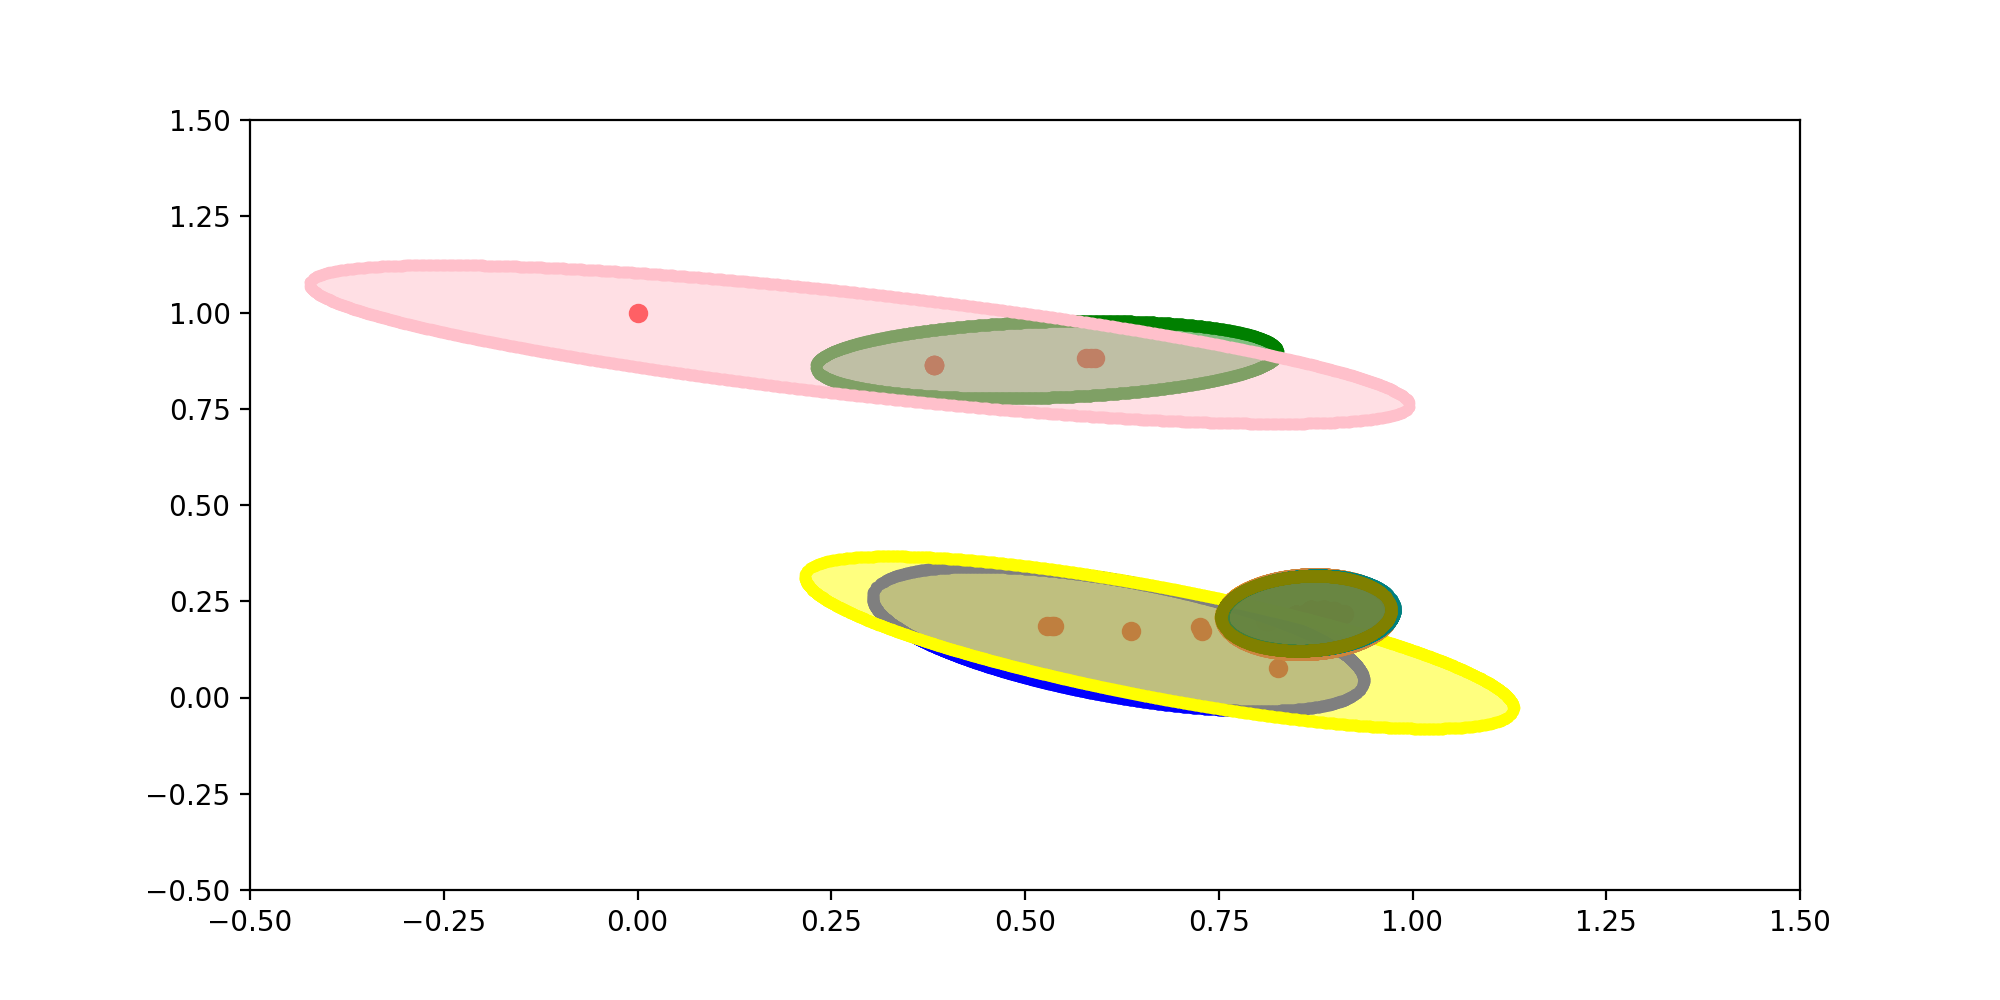

In [6]:
rotated_clusters = []
N = 10
colors = ['orange', 'blue', 'green', 'yellow', 'magenta', 'cyan', 'peru', 'pink', 'teal', 'olive']
plt.figure(figsize=(10, 5))
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
ax = plt.gca()
ax.scatter(xtest_scaled_2D[:, 0], xtest_scaled_2D[:, 1], color='red')

for i in range(N):
    center_x, center_y = cluster_means_2D[i]
    width, height, angle = get_width_height_angle(cluster_covs_2D[i])
    ellipse = Ellipse(xy=(center_x, center_y), width=width, height=height,
                     alpha=0.5, color=colors[i], angle=angle)

    a = width/2
    b = height/2
    # to avoid negative sqrt
    float_correction = 0.000001
    # float_correction = 0
    x = np.linspace(center_x-a+float_correction, center_x+a-float_correction, 1000)

    y = get_y(x, center_x, center_y, a, b)
    x_y_plus = np.stack((x,y[:, 0]), axis=1)
    x_y_minus = np.stack((x, y[:, 1]), axis=1)
    x_y = np.vstack((x_y_plus, x_y_minus))
    
    ax.add_artist(ellipse)
    # contour point (rotated)
    rotated_general_points = rotate_array(x_y, origin=(center_x, center_y), degrees=angle)
    rotated_clusters.append(rotated_general_points)
    ax.scatter(rotated_general_points[:, 0], rotated_general_points[:, 1], color=colors[i], s=10)

plt.show()

# Plot clusters on real map

In [17]:
# rescale, using scaler and rotated points from above
normalized_points = normalize_points(rotated_clusters, scaler)

# Data points
xtest_geo = xtest_MD[:, 2:]
xy = list(zip(xtest_geo[:, 0], xtest_geo[:, 1]))
# just initialize map location can be any valid lat lon
mapit = folium.Map( location=[52.667989, -1.464582], zoom_start=6 )

def plot_data_points(xy, mapit):
    '''
    Input:
        xy - user location coordinates (lat, lon)
        mapit - folium Map object
    
    Return:
        mapit - folium Map object with user location markers. 
    '''
    for i, coord in enumerate(xy):
        folium.Marker( location=[ coord[0], coord[1] ], 
                      popup=xtest_MF[i][-1] + " in clusters: " + str(soft_cluster_assignment_M[i]),
                     icon=folium.Icon(color="green", icon="user")).add_to( mapit )
    return mapit

In [43]:
def plot_clusters(normalized_cluster_points, mapit):
    '''
    Plots cluster ellipses.
    
    Input:
        normalized_cluster_points - ellipse countour location unscaled in real (lat, lon) array format.
        mapit - folium Map object
    Return:
        mapit - folium Map object with cluster ellipses.. 
    '''
    N = 10
    colors = ['red', 'blue', 'green', 'yellow', 'magenta', 'cyan', 'peru', 'pink', 'teal', 'olive']

    for i in range(N):
        folium_poly = normalized_cluster_points[i]

        html = f"""<div style="font-family: arial">
                   Cluster id:  {str(i)} <br>
                   Color: {str(colors[i])}
                   </div>
                """

        iframe = folium.IFrame(html,
                           width=150,
                           height=100)

        popup = folium.Popup(iframe,
                         max_width=150)

        folium.Polygon(folium_poly, fill_color=colors[i],
                      popup=popup).add_to(mapit)
    return mapit

In [21]:
mapit = plot_data_points(xy, mapit)
mapit = plot_clusters(normalize_points, mapit)

In [22]:
mapit 

# Plot clusters on real map [alternative, almost ellipse]

In [44]:
def get_vertices_ellipse(cluster_means_2D, cluster_covs_2D):
    '''
    Get vertices for all 10 ellipses goven means 2D and covs 2D
    '''
    cluster_verts = []

    for i in range(N):
        center_x, center_y = cluster_means_2D[i]
        width, height, angle = get_width_height_angle(cluster_covs_2D[i])
        ellipse = Ellipse(xy=(center_x, center_y), width=width, height=height,
                         alpha=0.5, color=colors[i], angle=angle)

        vertices = ellipse.get_verts() 
        cluster_verts.append(np.array(vertices))
    return cluster_verts

In [45]:
cluster_verts = get_vertices_ellipse(cluster_means_2D, cluster_covs_2D)
normalized_verts = normalize_points(cluster_verts, scaler)

In [46]:
mapit = folium.Map( location=[52.667989, -1.464582], zoom_start=6 )

In [47]:
mapit = plot_data_points(xy, mapit)
mapit = plot_clusters(normalized_verts, mapit)

In [48]:
mapit